## Setup

Importing the relevant packages

In [1]:
# Autoreload packages in case they change.
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [3]:
import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table

## Drawing blends with galsim_hub

BTK supports galaxy image generation with galsim_hub ; please refer to the catalog page of the documentation for more details on galsim_hub. The steps for using the galsim_hub generation are very similar to those from the previous section. Before starting this tutorial, you must install galsim_hub, which can be done using pip.

First, you should use the `CosmosCatalog` catalog instead of the Catsim one. While galsim_hub only require parameters for the image generation, we have chosen to use COSMOS as the source of those parameters so as to get a realistic distribution of those parameters. We have included a small sample of the catalog in BTK, and advise you to download the full catalog (see the documentation) for better results.

In [4]:
COSMOS_CATALOG_PATHS = [
"../data/cosmos/real_galaxy_catalog_23.5_example.fits",
"../data/cosmos/real_galaxy_catalog_23.5_example_fits.fits",
]
catalog = btk.catalog.CosmosCatalog.from_file(COSMOS_CATALOG_PATHS)

We then instantiate the sampling function ; you should use the one specific for galsim_hub, which includes a cut on the size of the galaxies, as artifacts tend to appear when trying to generate galaxies which are too big.

In [5]:
stamp_size = 24.0
sampling_function = btk.sampling_functions.DefaultSamplingGalsimHub(stamp_size=stamp_size)
survey = btk.survey.get_surveys("Rubin")

Then we can instantiate the `DrawBlendsGenerator` with the survey of your choice. Please bear in mind that while BTK will draw the images in any band you desire, galsim_hub does not generate a SED for the galaxy ; this means that the magnitude will be inacurrate in any other band than the one generated by the galsim_hub model you use (by default `"hub:Lanusse2020"`).

In [6]:
draw_generator = btk.draw_blends.GalsimHubGenerator(
      catalog,
      sampling_function,
      survey,
      batch_size=8,
      stamp_size=stamp_size,
      shifts=None,
      indexes=None,
      cpus=1,
      add_noise=True,
      galsim_hub_model="hub:Lanusse2020", #May be replaced by any model compatible with galsim_hub
      param_names=["flux_radius", "mag_auto", "zphot"], #Name of the parameters ; they must match with the model you provide
  )

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


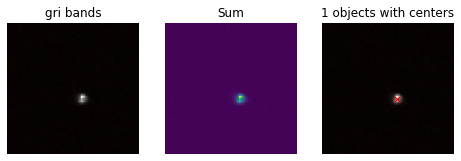

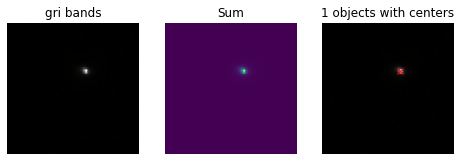

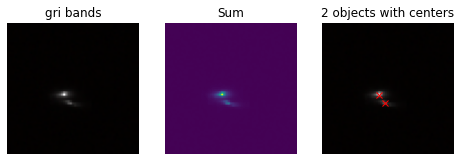

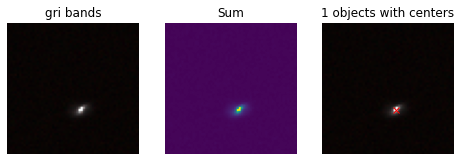

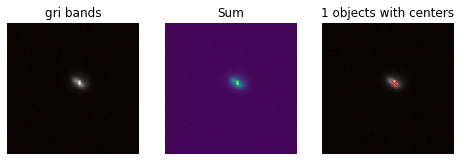

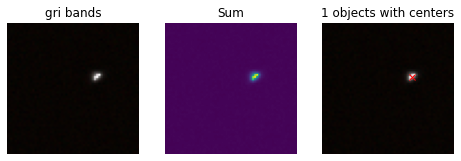

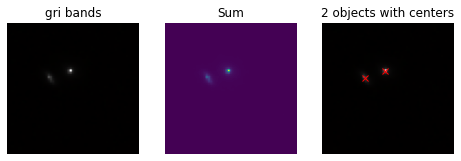

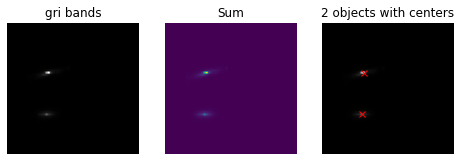

In [7]:
batch = next(draw_generator)
blend_images = batch['blend_images']
blend_list = batch['blend_list']
btk.plot_utils.plot_blends(blend_images, blend_list, limits=(30,90))